# Playing Atari with Deep Reinforcement Learning

- Link to paper: https://arxiv.org/abs/1312.5602

## Todo
- [x] implement model
- [x] implement experiencereplay
- [ ] implement training loop
- [ ] train cart-pole
- [ ] train lunar-lander
- [ ] train an atari game

In [1]:
import torch
import torch.nn

import torchvision.transforms as T

import gymnasium as gym

import utils

In [2]:
import sys
sys.path.append('../models')

from dqn import DQN, ReplayBuffer

In [3]:
transforms = T.Compose([
    T.Resize((84, 110)),
    T.CenterCrop((84, 84)),
    T.Grayscale(),
    T.ToTensor(),
])

In [4]:
replay_buffer = []
env = gym.make("LunarLander-v2", render_mode="rgb_array")
observation, info = env.reset()
replay_buffer.append(env.render())

In [5]:
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    replay_buffer.append(env.render())
    if terminated or truncated:
        observation, info = env.reset()

In [6]:
env.close()

In [7]:
utils.save_replay('.', 'replay', replay_buffer, 30)

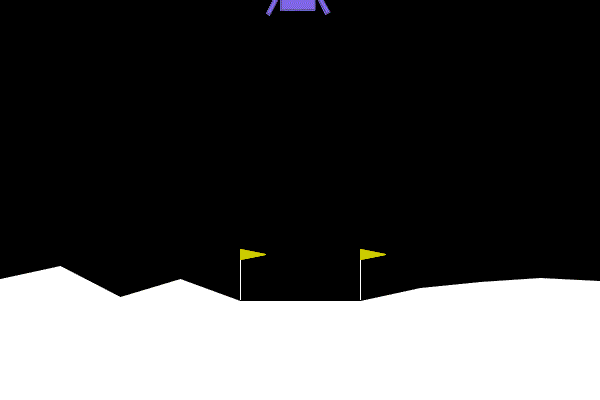

In [8]:
from IPython.display import Image 

Image('replay.gif')

In [9]:
model = DQN(5)
obs = transforms(utils.env_to_img(replay_buffer[0]))
model(obs.unsqueeze(0))

tensor([[ 0.0147, -0.0244,  0.0100,  0.0012,  0.0261]],
       grad_fn=<AddmmBackward0>)